In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
test_results_dir = "../../.results/2"

def read_test_results(file_path):
    data = {
        "random": {},
        "trust": {},
    }
    for dir in os.listdir(file_path):
        if dir.startswith("random"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["random"][num_threads] = json.load(f)
        elif dir.startswith("trust"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["trust"][num_threads] = json.load(f)
    return data

test_data = read_test_results(test_results_dir)
test_data

{'random': {7: {'time': 1200038,
   'coverage': [53,
    107,
    160,
    212,
    264,
    315,
    367,
    418,
    471,
    521,
    568,
    619,
    669,
    712,
    761,
    811,
    859,
    907,
    953,
    1003,
    1050,
    1097,
    1144,
    1194,
    1242,
    1289,
    1339,
    1389,
    1434,
    1482,
    1520,
    1566,
    1611,
    1660,
    1701,
    1752,
    1795,
    1841,
    1887,
    1935,
    1976,
    2023,
    2067,
    2111,
    2151,
    2196,
    2241,
    2288,
    2333,
    2380,
    2428,
    2473,
    2517,
    2558,
    2602,
    2648,
    2692,
    2735,
    2776,
    2821,
    2860,
    2906,
    2949,
    2990,
    3030,
    3072,
    3116,
    3150,
    3192,
    3232,
    3269,
    3311,
    3348,
    3388,
    3433,
    3471,
    3514,
    3555,
    3597,
    3640,
    3682,
    3724,
    3768,
    3809,
    3842,
    3880,
    3926,
    3968,
    4011,
    4051,
    4088,
    4125,
    4163,
    4193,
    4228,
    4267,
    4306,
    4

TypeError: 'Axes' object is not subscriptable

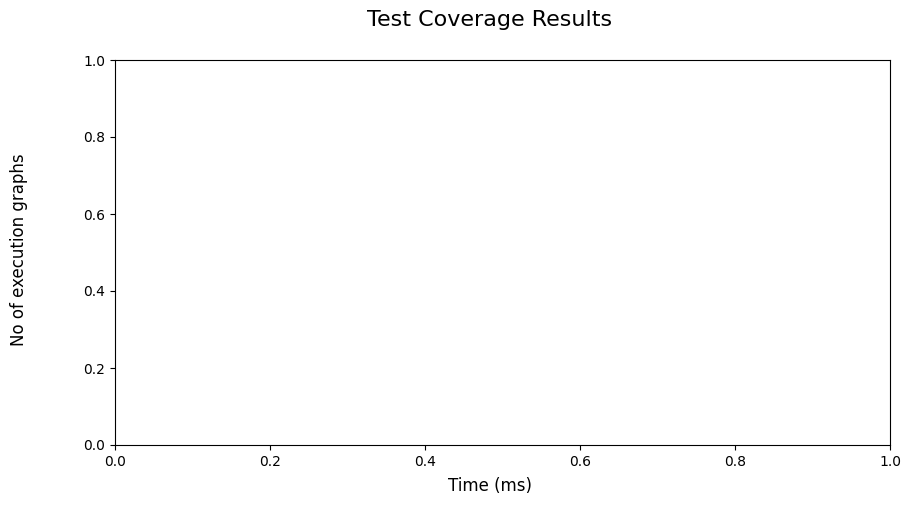

In [ ]:
def plot_test_data(data):
    num_plots = len(data["random"].keys())
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    fig.suptitle("Test Coverage Results", fontsize=16)
    fig.supxlabel("Time (ms)")
    fig.supylabel("No of execution graphs")

    BASE_THREADS_OFFSET = 6

    for (threads,cov_data) in data["random"].items():
        total_time = cov_data["time"]
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        if num_plots > 1:
            axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Random")
            axs[threads-BASE_THREADS_OFFSET].set_title(f"Threads: {threads}")
        else:
            axs.plot(x, coverage, label="Random")
            axs.set_title(f"Threads: {threads}")
    
    for (threads,cov_data) in data["trust"].items():
        total_time = cov_data["time"]
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        if num_plots > 1:
            axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Trust")
        else:
            axs.plot(x, coverage, label="Trust")
    
    plt.legend()
    plt.savefig("test_coverage_results.png")

plot_test_data(test_data)
